In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [9]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


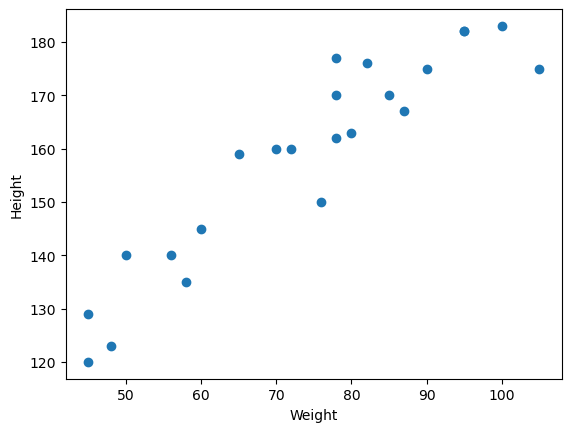

In [11]:
# Scatter Plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [13]:
# Correlation between x and y coordinates
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [15]:
import seaborn as sns

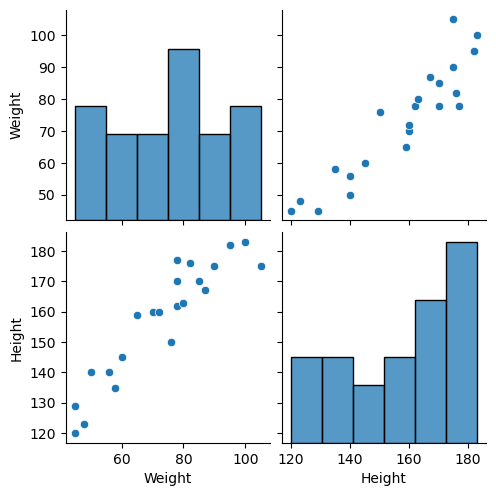

In [17]:
sns.pairplot(df)

<b>Linear Correlation is visible, so we can assume that Linear Regression will work.</b>

In [141]:
# Splitting into Independent and Dependent features

X = df[['Weight']] # Independent feature should be in the form of 2 dimensional array or dataframe
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [27]:
Y = df['Height'] # Dependent feature can be in series form or 1 dimensional array

<b>Train and Test Data split</b>

In [31]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [66]:
X_train.shape

(18, 1)

<b>Standardization</b>
<br>
Take each value in the independent feature and apply Z-Score with Mean = 0 and Std.Dev = 1

In [49]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train) # Applied Standardization to X training dataset
X_test = scaler.transform(X_test) # Applied Standardization to X testing dataset

We use transform instead of fit_transform in Test Data standardization to prevent data leakage.

<b>Linear Regression</b>

In [84]:
from sklearn.linear_model import LinearRegression

In [90]:
regression = LinearRegression(n_jobs = -1)

In [92]:
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [100]:
print(f'Coefficient or Slope: {regression.coef_}')     
print(f'Intercept: {regression.intercept_}')

Coefficient or Slope: [17.03440872]
Intercept: 157.5


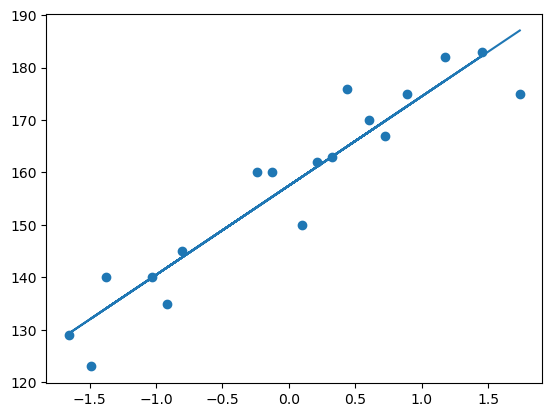

In [102]:
# Plotting Best fit line
plt.scatter(X_train, Y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

<b>Prediction for Test Data</b>
<br>
    -> Predicted Height Output = intercept + coeff(Weights)
    <br>
    -> Y_pred = 157.5 + 17.03(X_test)

In [112]:
Y_pred = regression.predict(X_test)

In [137]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [118]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [124]:
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MSE: 109.78
MAE: 9.82
RMSE: 10.48


<b> R square </b>
<br>
R^2 = 1 - SSR/SST
    <br>
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [130]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print(score)

0.7769869860423441


<b>Adjusted R square</b>
<br>
Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
<br>
R2 = The R2 of the model n = The number of observations k = The number of predictor variables

In [139]:
1 - (1-score)*(len(Y_test)-1) / (len(Y_test) - X_test.shape[1]-1)

0.7026493147231254